In [1]:
from main import *


In [32]:
import matplotlib.pyplot as plt
from typing import Optional
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.colors as colors


Label = Optional[str]
points : list[tuple[float, float, float, Label]] = []
lines : list[tuple[tuple[float, float], tuple[float, float], tuple[float, float]]] = []
polys : list[list[tuple[float, float, float]]] = []

def draw_point(m: Geo, label: Label = None):
    if xyz := coords(m):
        points.append((*xyz, label)) # type: ignore
    else:
        print(f'cannot draw a direction {m}')

def line(l: Geo) -> tuple[Geo, Geo]:
    l = l.normalize()
    mid = l.inv()*(l | O)
    dist = 3
    M = exp(dist*l*I)
    a = M * mid / M
    M = exp(-dist*l*I)
    b = M * mid / M
    return a, b
def draw_line(m: Geo, label: Optional[str]=None):
    A, B = line(m)
    print('line', A, B)
    xyz1 = coords(A)
    xyz2 = coords(B)
    if xyz1 is None or xyz2 is None:
        print('TODO')
    else:
        lines.append(tuple(zip(xyz1, xyz2))) # type: ignore
PLANE_RANGE = 3
def draw_plane(m: Geo) -> None:
    if ((m ^ e2) & e2).almost_eq(0):
        a, b = e1, e3
    elif ((m ^ e1) & e1).almost_eq(0):
        a, b = e2, e3
    else:
        a, b = e1, e2
    min1 = a - PLANE_RANGE * e0
    max1 = a + PLANE_RANGE * e0
    min2 = b - PLANE_RANGE * e0
    max2 = b + PLANE_RANGE * e0
    p1 = coords(min1 ^ min2 ^ m)
    p2 = coords(min1 ^ max2 ^ m)
    p3 = coords(max1 ^ max2 ^ m)
    p4 = coords(max1 ^ min2 ^ m)
    assert None not in (p1, p2, p3, p4)
    polys.append([p1, p2, p3, p4]) # type: ignore
    print('plane', polys[-1])

def draw_poly(ms: list[Geo], label: Optional[str]=None) -> None:
    points2 = []
    for m in ms:
        if xyz := coords(m):
            points2.append(xyz)
        else:
            print(f'draw poly cannot draw an ideal point {m}')
    polys.append(points2)

def draw(m: list[Geo] | Geo, label: str | None = None) -> None:
    if isinstance(m, list):
        draw_poly(m)
    else:
        g = m.grade()
        if g == 3:
            draw_point(m)
        elif g == 2:
            draw_line(m)
        elif g == 1:
            draw_plane(m)
        else:
            print(f"don't know how to draw {m}")

base_colors = tuple(colors.BASE_COLORS.values()) 
def show():
    global points, polys, lines
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.set_xlim(-PLANE_RANGE, PLANE_RANGE)
    ax.set_ylim(-PLANE_RANGE, PLANE_RANGE)
    ax.set_zlim(-PLANE_RANGE, PLANE_RANGE)
    x = [p[0] for p in points]
    y = [p[1] for p in points]
    z = [p[2] for p in points]
    ax.scatter(x, y, z)
    for l in lines:
        ax.plot(*l)
    for i, points2 in enumerate(polys):
        points2 = [[list(elem) for elem in points2]]
        print('poly', points2)
        tmp = Poly3DCollection(points2, alpha=.5)
        tmp.set_color(base_colors[i % len(base_colors)])
        ax.add_collection3d(tmp)
    points = []
    polys = []
    lines = []
    fig.show()

poly [[[-1.0, -1.0, 0.0], [-1.0, 1.0, 0.0], [1.0, 1.0, 0.0]]]


/tmp/ipykernel_32428/55777288.py:102: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


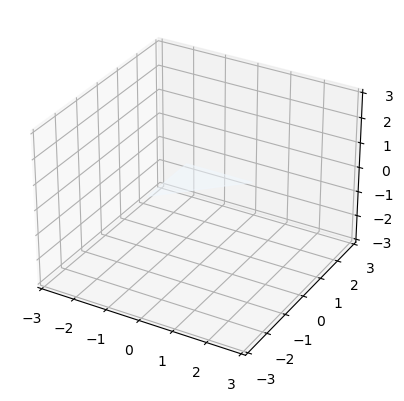

In [33]:
A = (-1*e1 - 1*e2 + e0).dual()
B = (-1*e1 + 1*e2 + e0).dual()
C = (1*e1 + 1*e2 + e0).dual()
draw([A, B, C])
show()

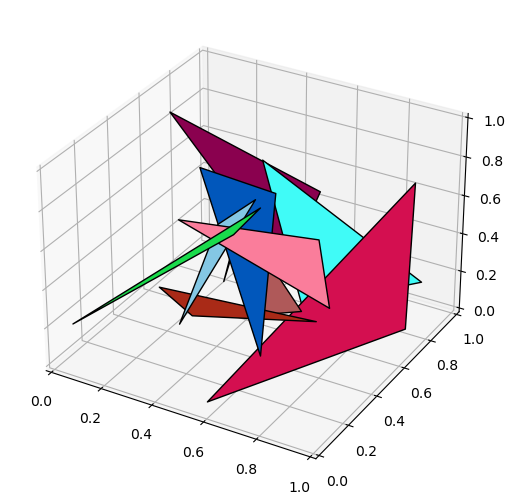

In [25]:
import mpl_toolkits.mplot3d as a3
import matplotlib.colors as colors
import pylab as pl
import numpy as np


fig = pl.figure()
ax = a3.Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
for i in range(10):
    vtx = np.random.rand(3,3)
    tri = a3.art3d.Poly3DCollection([vtx])
    tri.set_color(colors.rgb2hex(np.random.rand(3)))
    tri.set_edgecolor('k')
    ax.add_collection3d(tri)
pl.show()

plane [(3.0, -2.5, 3.0), (3.0, -2.5, -3.0), (-3.0, 3.5, -3.0), (-3.0, 3.5, 3.0)]
line -4.242640687119285e013 + 4.242640687119285e023 + 1.0e123 4.242640687119285e013 + -4.242640687119285e023 + 1.0e123
poly [[[-1.0, -1.0, 0.0], [-1.0, 1.0, 0.0], [1.0, 1.0, 0.0]]]
poly [[[3.0, -2.5, 3.0], [3.0, -2.5, -3.0], [-3.0, 3.5, -3.0], [-3.0, 3.5, 3.0]]]


/tmp/ipykernel_32428/1216260385.py:102: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


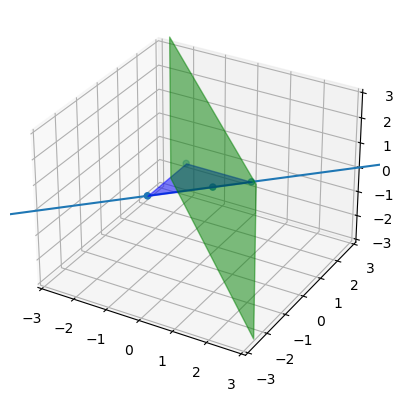

In [26]:
A = (-1*e1 - 1*e2 + e0).dual()
B = (-1*e1 + 1*e2 + e0).dual()
C = (1*e1  + 1*e2 + e0).dual()
draw(A, 'A')
draw(B, 'B')
draw(C, 'C')
draw([A, B, C])

L = 1*e1 + 1*e2 -0.5*e0
draw(L)

M = C & A
draw(M)

D = L ^ M
draw(D)

show()


line -4.242640687119285e013 + 4.242640687119285e023 + 1.0e123 4.242640687119285e013 + -4.242640687119285e023 + 1.0e123
plane [(3.0, -3.0, 3.0), (3.0, -3.0, -3.0), (-3.0, 3.0, -3.0), (-3.0, 3.0, 3.0)]
line -3.2426406871192848e013 + 5.242640687119285e023 + 1.0e123 5.242640687119285e013 + -3.2426406871192848e023 + 1.0e123
poly [[[1.0, 1.0, 0.0], [-1.0, 1.0, 0.0], [-1.0, -1.0, 0.0]]]
poly [[[3.0, -3.0, 3.0], [3.0, -3.0, -3.0], [-3.0, 3.0, -3.0], [-3.0, 3.0, 3.0]]]


/tmp/ipykernel_32428/1216260385.py:102: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


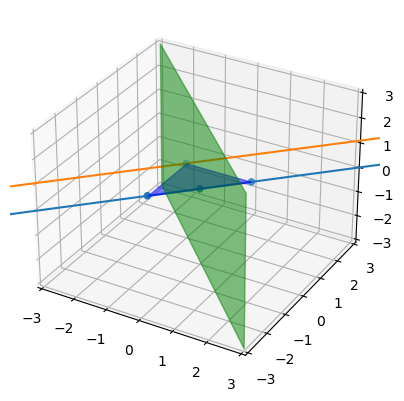

In [27]:
A = (1*e1 + 1*e2 + e0).dual()
B = (-1*e1 + 1*e2 + e0).dual()
C = (-1*e1 - 1*e2 + e0).dual()
draw(A, 'A')
draw(B, 'B')
draw(C, 'C')
draw([A, B, C])

AC = A & C
draw(A & C)

draw(AC | B)
draw((AC | B) / B)
#  | operator is left contraction, so i need a slighly different formula
draw(AC.inv() * (AC | B))
show()

line -4.242640687119285e013 + 4.242640687119285e023 + 1.0e123 4.242640687119285e013 + -4.242640687119285e023 + 1.0e123
plane [(3.0, -1.0, 3.0), (3.0, -1.0, -3.0), (-3.0, 5.0, -3.0), (-3.0, 5.0, 3.0)]
line -3.2426406871192848e013 + 5.242640687119285e023 + 1.0e123 5.242640687119285e013 + -3.2426406871192848e023 + 1.0e123
poly [[[1.0, 1.0, 0.0], [-1.0, 1.0, 0.0], [-1.0, -1.0, 0.0]]]
poly [[[3.0, -1.0, 3.0], [3.0, -1.0, -3.0], [-3.0, 5.0, -3.0], [-3.0, 5.0, 3.0]]]
poly [[[1.0, 1.0, 0.0], [1.0, 3.0, 0.0], [3.0, 3.0, 0.0]]]
poly [[[-1.0, 3.0, 0.0], [-1.0, 1.0, 0.0], [-3.0, 1.0, 0.0]]]
poly [[[-1.0, 3.0, 0.0], [1.0, 3.0, 0.0], [1.0, 5.0, 0.0]]]
poly [[[-1.0, 3.0, -0.0], [-1.0, 1.0, -0.0], [1.0, 1.0, -0.0]]]


/tmp/ipykernel_32428/1216260385.py:102: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


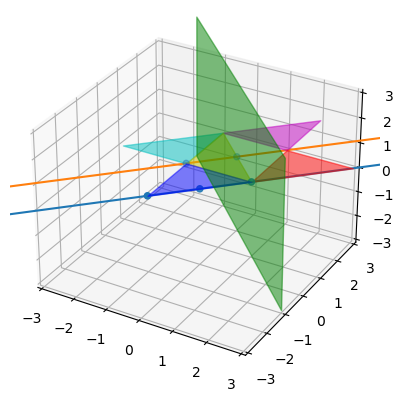

In [28]:


A = (1*e1 + 1*e2 + e0).dual()
B = (-1*e1 + 1*e2 + e0).dual()
C = (-1*e1 - 1*e2 + e0).dual()
draw(A, 'A')
draw(B, 'B')
draw(C, 'C')
draw([A, B, C])

L = A & C
draw(L, 'L')

draw(L | A)

# project L on B
draw((L | B) / B)

# project B on L
draw(L.inv() * (L | B))

p = L | A
draw([-1*p*X/p for X in [A, B, C]])

q = (L | B) / B
draw([-1*q*X/q for X in [A, B, C]])

H = q ^ (L | A)
draw(H, 'H')
draw([-1*H*X/H for X in [A, B, C]])


R = (B & A)/(B & L.inv() * (L | B))
draw([R*X/R for X in [A, B, C]])

show()

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3